In [1]:
import numpy as np
import tensorflow as tf
import h5py
import matplotlib.pyplot as plt

In [2]:
from utils.get_svhn import *

In [3]:
# download SVHN dataset

download_svhn()

Start downloading training data.
Complete downloading training data.
Start downloading test data.
Complete downloading test data.


In [4]:
# untar SVHN dataset

untar_svhn()

Start untaring training data.
Complete untaring training data.
Start untaring test data.
Complete untaring test data.


In [2]:
# extract data into h5py format

trainData = h5py.File('data/train/digitStruct.mat', 'r')
testData = h5py.File('data/test/digitStruct.mat', 'r')

In [3]:
from utils.data_extractor import generate_trainable_data,preprocess_data

In [4]:
# define the size of the data after extracting

size = 64

In [5]:
# transform data into array

X_train, y_train = generate_trainable_data(trainData, size, 'train')
X_test, y_test = generate_trainable_data(testData, size, 'test')

/home/ecbm4040/miniconda3/envs/envTF113/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [6]:
# preprocess data

X_train, X_test = preprocess_data(X_train, X_test)

In [7]:
# one hot encoding

y_train_dummy = tf.keras.utils.to_categorical(y_train)
y_test_dummy = tf.keras.utils.to_categorical(y_test)

In [8]:
# transform format of labels to fit the model

y_train_multi = []
y_test_multi = []
for i in range(6):
    y_train_multi.append(y_train_dummy[:,i])
    y_test_multi.append(y_test_dummy[:,i])

In [9]:
from utils.cnn.dense import dense_model

In [10]:
input_shape = (size, size, 3)

model = dense_model(input_shape)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
from time import time

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=2)
tensorboard = TensorBoard(log_dir="log/{}".format(time()))

history_train = model.fit(X_train, y_train_multi, validation_split=0.2, batch_size=128, epochs=20, callbacks=[early_stopping, tensorboard])

Train on 26721 samples, validate on 6681 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
26721/26721 [==============================] - 60s 2ms/sample - loss: 8.3694 - dense_2_loss: 1.3478 - dense_3_loss: 2.4972 - dense_4_loss: 2.7712 - dense_5_loss: 1.4233 - dense_6_loss: 0.3007 - dense_7_loss: 0.0291 - dense_2_acc: 0.5653 - dense_3_acc: 0.2733 - dense_4_acc: 0.1790 - dense_5_acc: 0.6912 - dense_6_acc: 0.9529 - dense_7_acc: 0.9949 - val_loss: 8.4975 - val_dense_2_loss: 1.6582 - val_dense_3_loss: 1.9930 - val_dense_4_loss: 2.4600 - val_dense_5_loss: 1.9194 - val_dense_6_loss: 0.4617 - val_dense_7_loss: 0.0051 - val_dense_2_acc: 0.2663 - val_dense_3_acc: 0.2935 - val_dense_4_acc: 0.1317 - val_dense_5_acc: 0.5246 - val_dense_6_acc: 0.9543 - val_dense_7_acc: 0.9999
Epoch 2/20
26721/26721 [==============================] - 53s 2ms/sample - loss: 4.4394 - dense_2_loss: 0.4857 - dense_3_loss: 1.3385 - dense_4_loss: 1.5496 - dense_5_loss: 0.8588 - dense_6_loss: 0.2030 - den

In [13]:
result = model.evaluate(X_test, y_test_multi)

13068/13068 [==============================] - 10s 770us/sample - loss: 1.4384 - dense_2_loss: 0.1929 - dense_3_loss: 0.4692 - dense_4_loss: 0.5128 - dense_5_loss: 0.2333 - dense_6_loss: 0.0282 - dense_7_loss: 0.0020 - dense_2_acc: 0.9575 - dense_3_acc: 0.8872 - dense_4_acc: 0.8810 - dense_5_acc: 0.9500 - dense_6_acc: 0.9932 - dense_7_acc: 0.9998


In [14]:
result[7:]

[0.9574533, 0.88720536, 0.881007, 0.9499541, 0.99318945, 0.99984694]

In [15]:
# predict

y_pred = np.array(model.predict(X_test))

In [16]:
# transform prediction of probability into labels

pred_label = np.transpose(y_pred.argmax(axis=2))

In [17]:
# compare predictions and gound truth

import pandas as pd

pd_test = pd.DataFrame(y_test)
pd_pred = pd.DataFrame(pred_label)

com_result = pd_test == pd_pred
com_result

,0,1,2,3,4,5
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,False,True,True,True,True
4,True,False,True,True,True,True
...,...,...,...,...,...,...
13063,True,True,True,True,True,True
13064,True,True,True,True,True,True
13065,True,True,True,True,True,True
13066,True,True,True,True,True,True


In [18]:
# compute overall accuracy

num = 0

for i in range(len(com_result)):
    if all(com_result.iloc[i]):
        num += 1
        
print("acc: {}".format(num/len(com_result)))

acc: 0.7768595041322314


In [19]:
train_acc = []
val_acc = []

for i in range(2,8):
    train_acc.append(history_train.history['dense_{}_acc'.format(i)])
    val_acc.append(history_train.history['val_dense_{}_acc'.format(i)])

train_loss = history_train.history['loss']
val_loss = history_train.history['val_loss']

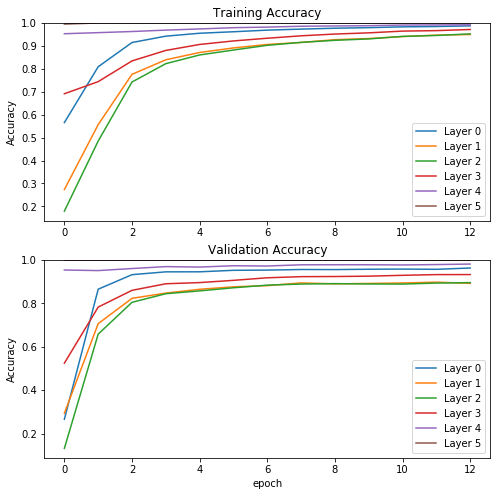

In [20]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
for i in range(6):
    plt.plot(train_acc[i], label='Layer {}'.format(i))
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training Accuracy')

plt.subplot(2, 1, 2)
for i in range(6):
    plt.plot(val_acc[i], label='Layer {}'.format(i))
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Validation Accuracy')

plt.xlabel('epoch')
plt.show()

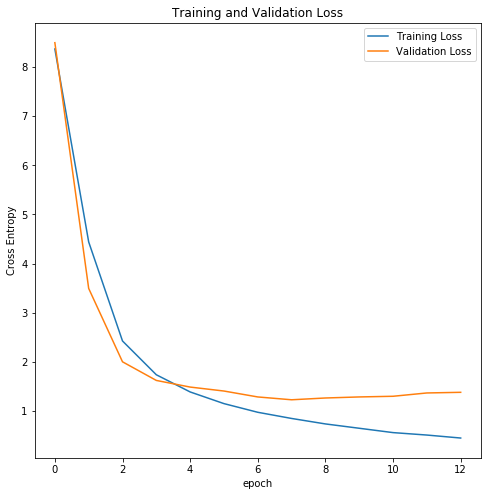

In [21]:
plt.figure(figsize=(8, 8))

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()